## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [8]:
import tensorflow as tf
tf.random.set_seed(42)
print(tf.__version__)

2.1.0-rc1


In [0]:
import numpy as np
import keras
%matplotlib inline
import matplotlib.pyplot as plt

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names_list = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names = np.array(class_names_list)

###4. Find no.of samples in training and test dataset

In [83]:
x_train.shape[0]

60000

In [84]:
x_test.shape[0]

10000

###5. Find dimensions of an image in the dataset

In [85]:
x_train.shape[1:3]

(28, 28)

### 6. Verify if existing labels/Classes are correct 

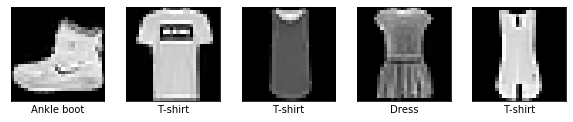

In [86]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [0]:
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_norm = (x_train - np.min(x_train))/(np.max(x_train) - np.min(x_train))

In [0]:
x_test_norm = (x_test - np.min(x_train))/(np.max(x_train) - np.min(x_train))

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
x_train_norm_exp = tf.keras.backend.expand_dims(x_train_norm).numpy()

In [0]:
x_test_norm_exp = tf.keras.backend.expand_dims(x_test_norm).numpy()

###10. Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Conv1D, Conv2D
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:
model.fit(x_train_norm_exp, y_train_cat,          
          validation_data=(x_test_norm_exp,y_test_cat),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3746 - accuracy: 0.8660 - val_loss: 0.3154 - val_accuracy: 0.8876
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2290 - accuracy: 0.9148 - val_loss: 0.2652 - val_accuracy: 0.9037
Epoch 3/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1645 - accuracy: 0.9393 - val_loss: 0.2467 - val_accuracy: 0.9153
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1137 - accuracy: 0.9572 - val_loss: 0.2525 - val_accuracy: 0.9196
Epoch 5/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0755 - accuracy: 0.9721 - val_loss: 0.3110 - val_accuracy: 0.9154
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0505 - accuracy: 0.9813 - val_loss: 0.3641 - val_accuracy: 0.9137
Epoch 7/10
60000/60000 [==========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Adding MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Adding Dropout layer
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [151]:
model.fit(x_train_norm_exp, y_train_cat,          
          validation_data=(x_test_norm_exp,y_test_cat),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3913 - accuracy: 0.8584 - val_loss: 0.3194 - val_accuracy: 0.8828
Epoch 2/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2558 - accuracy: 0.9068 - val_loss: 0.2538 - val_accuracy: 0.9069
Epoch 3/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.2093 - accuracy: 0.9216 - val_loss: 0.2282 - val_accuracy: 0.9134
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1763 - accuracy: 0.9341 - val_loss: 0.2159 - val_accuracy: 0.9221
Epoch 5/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1481 - accuracy: 0.9449 - val_loss: 0.2302 - val_accuracy: 0.9191
Epoch 6/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1253 - accuracy: 0.9532 - val_loss: 0.2292 - val_accuracy: 0.9234
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

In [152]:
model.evaluate(x_test_norm_exp,y_test_cat)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.2832 - accuracy: 0.9242


[0.28315883635245265, 0.9242]

####14. Verify performance of your model selectively 

In [0]:
predictions = model.predict(x_test_norm_exp)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

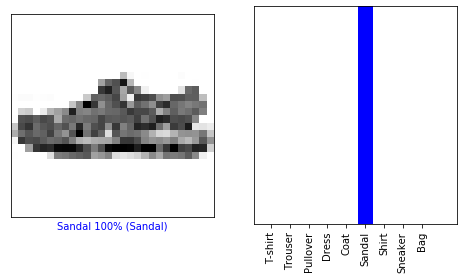

In [156]:
#Replace value of i with other index to check other product
i = 21
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [170]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train_norm_exp)

model.fit_generator(datagen.flow(x_train_norm_exp, y_train_cat, batch_size=32),
                    steps_per_epoch=len(x_train_norm_exp) / 32, epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1875.0 steps
Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.0059 - accuracy: 0.6511
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6741 - accuracy: 0.7474
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6025 - accuracy: 0.7753
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5595 - accuracy: 0.7913
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5283 - accuracy: 0.8063
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5078 - accuracy: 0.8130
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4841 - accuracy: 0.8205
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4670 - accuracy: 0.8270
Epoch 9/10
1875/1875 [======================

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

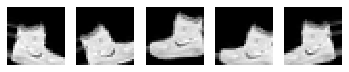

In [171]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_norm_exp[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()